In [42]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## CS104 Final Exam Grade Analysis  ##
As instructors, we always want to improve our teaching and care about our students' success.

In this example, we analyze data from my CS104: Introduction to Programming course. Specifically, we look at the Final Exam Grades of 364 students (15 sections from 2017 through 2023).
A first Observation: 
We noticed that the average final exam score in one section (Spring 2022) was higher than in other sections. 
Questions arise: Is this lower average just by chance or was something else going on that semester? 

E.g. If this is not by chance, what was different that semester? Was the teaching different? Where students more prepared for the final exam?

In [43]:
scores = Table().read_table('DataCS104Sections.csv')
scores

Year,Semester,Overall Section,Final exam grades,Final exam grade %,Notes
2017,Fall,1,92,61.33,nan
2017,Fall,1,106,70.67,nan
2017,Fall,1,131,87.33,nan
2017,Fall,1,86,57.33,nan
2017,Fall,1,154,100,nan
2017,Fall,1,77,51.33,nan
2017,Fall,1,135,90,nan
2017,Fall,1,100,66.67,nan
2017,Fall,1,0,0,nan
2017,Fall,1,116,77.33,nan


In [47]:
# Let's first drop a couple of columns to simplify
scores = scores.drop('Final exam grades', 'Notes')
scores

Year,Semester,Overall Section,Final exam grade %
2017,Fall,1,61.33
2017,Fall,1,70.67
2017,Fall,1,87.33
2017,Fall,1,57.33
2017,Fall,1,100
2017,Fall,1,51.33
2017,Fall,1,90
2017,Fall,1,66.67
2017,Fall,1,0
2017,Fall,1,77.33


In [49]:
# What data can or cannot be used if we want to analyze the Final exam grades?
scores_CS104 = scores.where('Final exam grade %', are.not_equal_to(0))
scores_CS104

Year,Semester,Overall Section,Final exam grade %
2017,Fall,1,61.33
2017,Fall,1,70.67
2017,Fall,1,87.33
2017,Fall,1,57.33
2017,Fall,1,100
2017,Fall,1,51.33
2017,Fall,1,90
2017,Fall,1,66.67
2017,Fall,1,77.33
2017,Fall,1,92


In [51]:
# Let's look at the number of students in each section using group
scores_CS104.group('Overall Section').show()


Overall Section,count
1,19
2,19
3,21
4,20
5,14
6,22
7,23
8,18
9,21
10,27


In [53]:
# Let's look at the average score for students in each section using group
scores_CS104_avg = scores_CS104.group(['Overall Section','Year','Semester'], np.average)
scores_CS104_avg.show()

Overall Section,Year,Semester,Final exam grade % average
1,2017,Fall,78.1747
2,2018,Spring,76.5274
3,2018,Fall,81.6181
4,2018,Fall,83.833
5,2019,Spring,79.1136
6,2019,Fall,81.0005
7,2019,Fall,79.7104
8,2020,Spring,80.5178
9,2020,Fall,80.1581
10,2021,Spring,77.8022


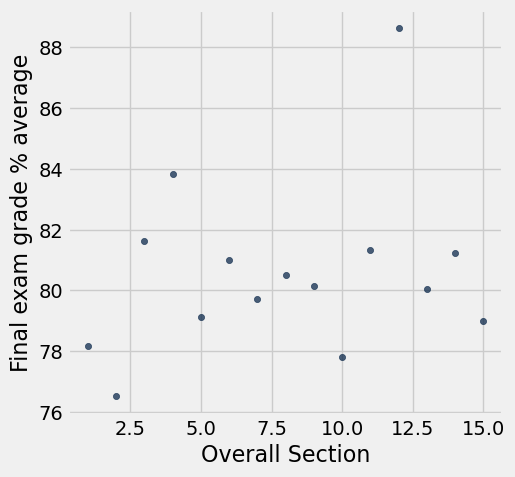

In [54]:
# Visualize using a scatter plot
scores_CS104_avg.scatter(0,3)

In [55]:
# What is the observed average for section 12
observed_average_CS104 = 88.6227

In [61]:
# null hypothesis: let's assume that the sections were picked at random (15 students at random)
# Can we simulate 1 sample of 15 students drawn at random?
# Which table method should we use? with or without replacement?
aSample = scores_CS104.sample(15, with_replacement = False)
np.average(aSample.column('Final exam grade %'))

83.943333333333342

In [ ]:
# Now we are ready to simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class
# what would be a good test statistic?


In [67]:
# Function
def one_random_average(tbl, SampleSize, ColumnName):
    aSample = tbl.sample(SampleSize, with_replacement = False)
    avg = np.average(aSample.column(ColumnName))
    return avg
one_random_average(scores_CS104,15,  'Final exam grade %')

82.864666666666665

In [68]:
# Now let's Simulate 50,000 copies of the test statistic
averages = make_array()
for i in np.arange(50000):
    next_Average = one_random_average(scores_CS104,15,  'Final exam grade %')
    averages = np.append(averages, next_Average)
averages

array([ 81.46666667,  80.88133333,  76.61333333, ...,  79.38      ,
        81.676     ,  80.12733333])

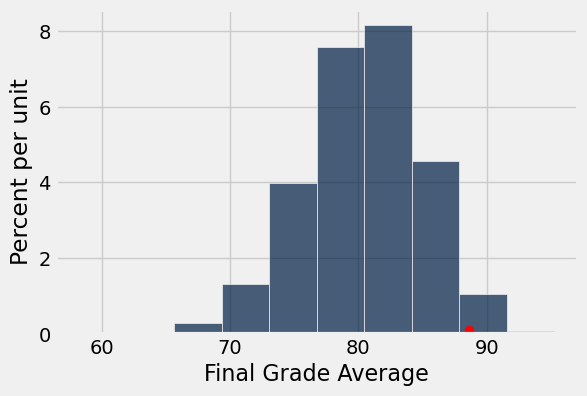

In [71]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
myAvg = Table().with_column('Final Grade Average', averages)
myAvg.hist()
plots.scatter(observed_average_CS104, 0.001, color = 'red', s=40);

In [79]:
# How can we answer: How certain are we of our decision?
# One way: look at the area (aka %) of the simulation that would favor the alternative
# In other words: what percent of the repetitions in this simulations were greater than
# or equal to the observed average
100*np.count_nonzero(myAvg.column('Final Grade Average') >= observed_average_CS104)/50000

2.54

In [ ]:
#let's look at the convention (see slides)

In [80]:
# Where is the 5% cutoff when running 50,000 repetitions?
five_percent_point = myAvg.sort(0).column(0).item(47499)
five_percent_point

87.48333333333335

In [83]:
# Where is the 1% cutoff when running 50,000 repetitions?
one_percent_point = myAvg.sort(0).column(0).item(49499)
one_percent_point

89.90266666666668

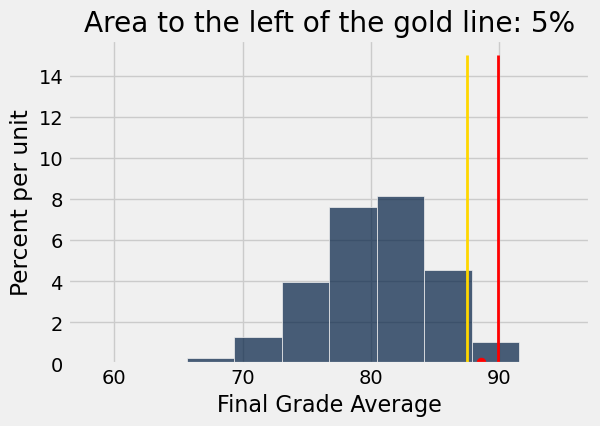

In [84]:
#Let's visualize as a histogram
myAvg.hist()
plots.scatter(observed_average_CS104, 0.001, color = 'red', s=40);
plots.plot([five_percent_point, five_percent_point], [0, 0.15], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.plot([one_percent_point, one_percent_point], [0, 0.15], color='red', lw=2)


## Below is some more exploratory analysis (Not part of the demo)

I would like to see if I can see some inconsistencies from one semester to another over the course of the years/semesters

In [85]:
#Now let's look at the number of students taught each semester using group
scores_CS104.group('Year').show()
# Note 2017 only includes Fall, 2023 only includes Spring

Year,count
2017,19
2018,60
2019,59
2020,39
2021,43
2022,53
2023,22


In [86]:
#How about the average grade? Is there a difference between Fall and Spring?
scores_CS104.group('Year', np.average).select('Year', 'Final exam grade % average').show()

Year,Final exam grade % average
2017,78.1747
2018,80.7443
2019,80.0498
2020,80.3241
2021,79.1163
2022,82.8432
2023,78.9932


Looks very similar, maybe not worth investigating

In [87]:
# Let's go back to the original table of grades
# What other questions could we investigate?
scores

Year,Semester,Overall Section,Final exam grade %
2017,Fall,1,61.33
2017,Fall,1,70.67
2017,Fall,1,87.33
2017,Fall,1,57.33
2017,Fall,1,100
2017,Fall,1,51.33
2017,Fall,1,90
2017,Fall,1,66.67
2017,Fall,1,0
2017,Fall,1,77.33


In [88]:
scores_sections = scores.group('Overall Section')
scores_sections

Overall Section,count
1,23
2,22
3,27
4,28
5,23
6,29
7,28
8,22
9,24
10,29


In [89]:
# I wonder if there is a difference in the number of students who did not show up for the final exam from semester to semester
num_student_drops = scores.where("Final exam grade %", 0).group('Overall Section').relabel('count', 'exam no shows')
num_student_drops.show()
# num_student_exams = scores.where("Final exam grade %" != 0).group(['Overall Section', 'Year','Semester']).relabel('count', 'number of students')
percent_no_shows = num_student_drops.column('exam no shows')* 100/(scores_sections.column('count'))
percent_no_shows
complete_table = num_student_drops.join('Overall Section', scores_sections).with_column('% no shows', percent_no_shows)
complete_table.show()

Overall Section,exam no shows
1,4
2,3
3,6
4,8
5,9
6,7
7,5
8,4
9,3
10,2


Overall Section,exam no shows,count,% no shows
1,4,23,17.3913
2,3,22,13.6364
3,6,27,22.2222
4,8,28,28.5714
5,9,23,39.1304
6,7,29,24.1379
7,5,28,17.8571
8,4,22,18.1818
9,3,24,12.5
10,2,29,6.89655


In [90]:
# Spring 2019 had a really high number of no shows. Is this by chance or could there have been something else going on?
observed_noshows = 39.1304

In [91]:
def sample_percent(tbl, sampleSize, columnName):
    sample_section = tbl.sample(sampleSize, with_replacement = False)
    num_student_drops = sample_section.where(columnName, 0).num_rows
    num_student_exams = sample_section.where(columnName, are.not_equal_to(0)).num_rows
    sample_p = num_student_drops* 100/sampleSize
    #print(num_student_drops,num_student_exams,sampleSize)
    return sample_p

sample_percent(scores,23 , 'Final exam grade %')

26.08695652173913

In [92]:
percents = make_array()
for n in np.arange(10000):
    next_percent = sample_percent(scores, 23, 'Final exam grade %')
    percents = np.append(percents, next_percent)


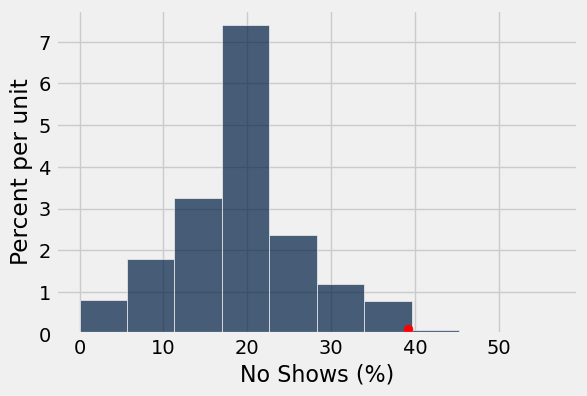

In [93]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic
noShows = Table().with_column('No Shows (%)', percents)
noShows.hist()
plots.scatter(observed_noshows, 0.001, color = 'red', s=40);

In [94]:
# How can we answer: How certain are we of our decision?
# One way: look at the area (aka %) of the simulation that would favor the alternative
# In other words: what percent of the repetitions in this simulations were greater than
# or equal to the observed value
100*(np.count_nonzero(noShows.column('No Shows (%)') >= observed_noshows)/10000)

1.79

(39.1304, 39.130434782608695, 30.434782608695652)

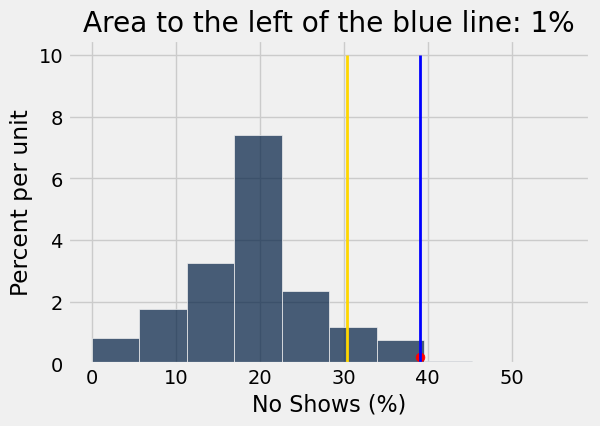

In [95]:
noShows = Table().with_column('No Shows (%)', percents)
noShows.hist()
# Where is the 5% cutoff when running 10,000 repetitions?
five_percent = noShows.sort(0).column(0).item(9499)
five_percent
plots.plot([five_percent, five_percent], [0, 0.10], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');

# Where is the 1% cutoff when running 10,000 repetitions?
one_percent = noShows.sort(0).column(0).item(9899)
one_percent
plots.plot([one_percent, one_percent], [0, 0.10], color='blue', lw=2)
plots.title('Area to the left of the blue line: 1%');

plots.scatter(observed_noshows, 0.002, color = 'red', s=40);
observed_noshows,one_percent,five_percent